<a href="https://colab.research.google.com/github/jeffj9930/3D_MRI_medical_imaging/blob/master/read_mri_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
#image = nib.load("/home/jeff/Documents/ml_files/medical_imaging/small/t1/IXI102-HH-1416-T1_fcm.nii.gz")


Mounted at /content/gdrive


# Read MRI Image Data

In [3]:
import os
import random
from random import randint
import numpy as np
import torch
import torchvision
import nibabel as nib
import matplotlib.pyplot as plt
from glob import glob
import sys
%matplotlib inline

root_dir = "/content/gdrive/My Drive/"
image_dir = os.path.join(root_dir,'ml_files/medical_imaging/small/')
t1_dir = os.path.join(image_dir, 't1')
t2_dir = os.path.join(image_dir, 't2')
t1_images = glob(os.path.join(t1_dir,'*.nii.gz'))
t2_images = glob(os.path.join(t2_dir,'*.nii.gz'))
assert len(t1_images) == len(t2_images) and len(t1_images) != 0

In [4]:
seed = 22
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [30]:
patient = randint(0,len(t1_images))
imvol_t1 = nib.load(t1_images[patient]).get_fdata()
imvol_t2 = nib.load(t2_images[patient]).get_fdata()


Select Slice Dimensions


In [31]:
slice_t1 = imvol_t1[:,45,:]
slice_t2 = imvol_t2[:,45,:]

In [32]:
print("Volume dimensions: {}".format(imvol_t1.shape))
print("Number of slices: {}".format(len(slice_t1)))
print("Patient CT Images Shape: {}".format(slice_t1.shape))
print("Slice_t1's min and max: {:.4f} : {:.4f}".format(slice_t1.min(),slice_t1.max()))
print("Slice_t2's min and max: {:.4f} : {:.4f}".format(slice_t2.min(),slice_t2.max()))

Volume dimensions: (120, 120, 90)
Number of slices: 120
Patient CT Images Shape: (120, 90)
Slice_t1's min and max: -0.0216 : 2.5753
Slice_t2's min and max: -0.0013 : 4.0982


In [33]:
print(slice_t1)

[[-1.39747253e-20 -1.79971695e-12  6.38870467e-14 ... -1.16122147e-11
   6.42755163e-14  1.52660335e-15]
 [ 5.91178107e-14  4.41939665e-06 -3.58289117e-06 ...  3.14520585e-05
  -2.69578345e-06  1.04584309e-07]
 [ 2.95707187e-12  1.61301767e-04 -1.14645773e-04 ...  1.12706027e-03
  -9.68528766e-05  3.75723084e-06]
 ...
 [-5.07460562e-09  3.08572955e-04 -2.60256988e-04 ... -6.09766357e-06
  -6.58569188e-05  1.94359245e-06]
 [-3.60339480e-10  1.66582307e-04  3.94119648e-03 ... -6.06962703e-06
   9.82738857e-05 -2.84514090e-06]
 [-3.91859427e-11  2.03129412e-06 -1.11291747e-05 ... -2.34547457e-08
   3.69168134e-07 -1.06862164e-08]]


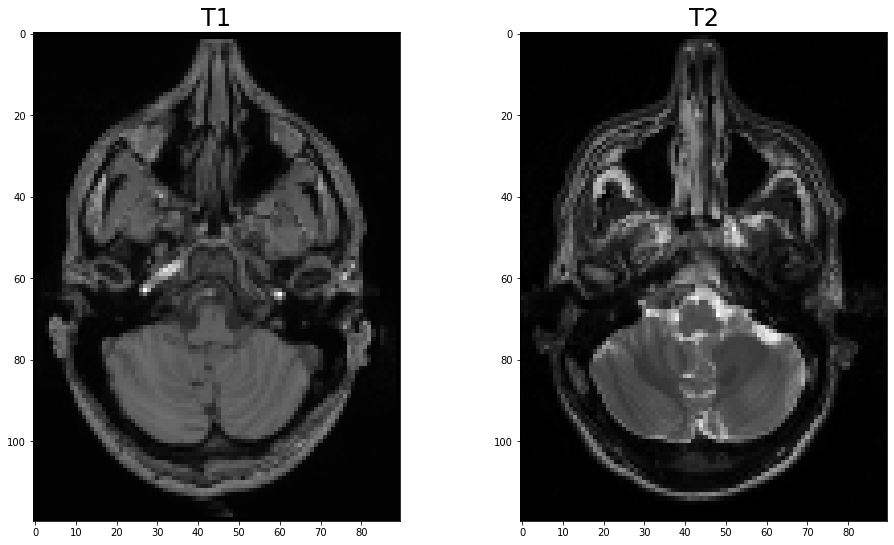

In [34]:

fig, axes = plt.subplots(1,2,figsize=(16,9))
axes[0].imshow(slice_t1,cmap='gray');axes[0].set_title('T1',fontsize=24)
axes[1].imshow(slice_t2,cmap='gray');axes[1].set_title('T2',fontsize=24)
plt.show()